In [107]:
import pandas as pd
import numpy as  np

%matplotlib inline
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score,classification_report
from warnings import filterwarnings
from plotly.subplots import make_subplots
import plotly.graph_objects as go



from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier



from warnings import filterwarnings

filterwarnings('ignore')

In [108]:
df = pd.read_csv('BankChurners.csv')
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [109]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [110]:
# Remove all the un-necessary colums which are not consideraded and nore related.
colsToDrop = ['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df.drop(colsToDrop, axis=1, inplace=True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [112]:
df['Income_Category'].replace({'$60K - $80K': "60k_80k", 'Less than $40K': "0_40k", '$80K - $120K': "80k_120k",
                                        '$40K - $60K': "40k_60k", "$120K +": "120k_plus"}, inplace = True)

In [113]:
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [114]:
# This visual check will ensure that there is no null value is replaced with some other value like :- -999,-0.1,-1

for feature in df.columns:
    print('*******','Column name:',feature,'*******')
    print(df[feature].unique())
    print(' ')

******* Column name: Attrition_Flag *******
['Existing Customer' 'Attrited Customer']
 
******* Column name: Customer_Age *******
[45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
 
******* Column name: Gender *******
['M' 'F']
 
******* Column name: Dependent_count *******
[3 5 4 2 0 1]
 
******* Column name: Education_Level *******
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
 
******* Column name: Marital_Status *******
['Married' 'Single' 'Unknown' 'Divorced']
 
******* Column name: Income_Category *******
['60k_80k' '0_40k' '80k_120k' '40k_60k' '120k_plus' 'Unknown']
 
******* Column name: Card_Category *******
['Blue' 'Gold' 'Silver' 'Platinum']
 
******* Column name: Months_on_book *******
[39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22 26 13 51 19 15 17 18 16 14]
 
******* Column name: Tota

In [115]:
# categoric features
cat = df.select_dtypes(['object'])
cat_columns = cat.columns
cat_columns

# numeric features
numeric_values = df.select_dtypes(['int','float'])


print(cat.shape)
print(cat.info())
cat.head()

(10127, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Attrition_Flag   10127 non-null  object
 1   Gender           10127 non-null  object
 2   Education_Level  10127 non-null  object
 3   Marital_Status   10127 non-null  object
 4   Income_Category  10127 non-null  object
 5   Card_Category    10127 non-null  object
dtypes: object(6)
memory usage: 474.8+ KB
None


,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,Existing Customer,M,High School,Married,60k_80k,Blue
1,Existing Customer,F,Graduate,Single,0_40k,Blue
2,Existing Customer,M,Graduate,Married,80k_120k,Blue
3,Existing Customer,F,High School,Unknown,0_40k,Blue
4,Existing Customer,M,Uneducated,Married,60k_80k,Blue


In [116]:
cat.nunique()

print(numeric_values.shape)
print(numeric_values.info())
numeric_values.head()

(10127, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Dependent_count           10127 non-null  int64  
 2   Months_on_book            10127 non-null  int64  
 3   Total_Relationship_Count  10127 non-null  int64  
 4   Months_Inactive_12_mon    10127 non-null  int64  
 5   Contacts_Count_12_mon     10127 non-null  int64  
 6   Credit_Limit              10127 non-null  float64
 7   Total_Revolving_Bal       10127 non-null  int64  
 8   Avg_Open_To_Buy           10127 non-null  float64
 9   Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 10  Total_Trans_Amt           10127 non-null  int64  
 11  Total_Trans_Ct            10127 non-null  int64  
 12  Total_Ct_Chng_Q4_Q1       10127 non-null  float64
 13  Avg_Utilization_Ratio     10127 non-null  float64

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [117]:
from plotly.subplots import make_subplots
import plotly.io as iop
import plotly.graph_objs as go
cstage = numeric_values.groupby(['Customer_Age']).aggregate('mean') # group the age 
fig = make_subplots(
    rows=5, cols=1,
    subplot_titles=("Relationship between Age and Credit Card limit", "Relationship between Age and Dependent Count", "Relationship between Age and Avg_Open_To_Buy", 
                    "Relationship between Age and Total_Revolving_Bal","Relationship between Age and Contacts_Count_12_mon"
                    ))

fig.add_trace(go.Scatter(x=cstage.index, y=cstage.Credit_Limit,mode='lines+markers' ),
              row=1, col=1)

fig.add_trace(go.Bar(x=cstage.index, y=cstage.Dependent_count),
              row=2, col=1)

fig.add_trace(go.Scatter(x=cstage.index, y = cstage.Avg_Open_To_Buy,marker={'color': 'blue'},mode = 'lines+markers'),
              row=3, col=1)

fig.add_trace(go.Bar(x=cstage.index, y=cstage.Total_Revolving_Bal, marker  = {'color':'gray'} ),
              row=4,col=1)
fig.add_trace(go.Scatter(x = cstage.index ,y = cstage.Contacts_Count_12_mon, marker = {'color':'magenta'},mode = 'lines+markers'),
             row=5,col=1)

fig.update_layout(height=1200, width=900,
                  title_text="Relationship between Age and other features")

fig.show()

In [118]:
#'Attrition_Flag'
target_df = df['Attrition_Flag'].value_counts().reset_index()
target_df.columns = ['Customer status','Count']
target_df['Percentage'] = target_df['Count'].apply(lambda x: x/target_df['Count'].sum()*100)
print(target_df)

     Customer status  Count  Percentage
0  Existing Customer   8500   83.934038
1  Attrited Customer   1627   16.065962


Text(0.5, 1.0, 'Number of existing customer and customer who left')

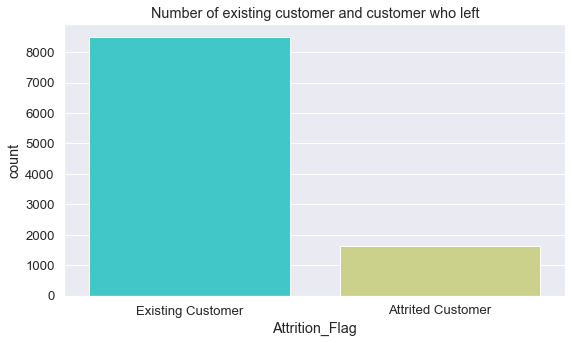

In [119]:
# bar chart
plt.figure(figsize=(8,5))
sns.set_context(context='notebook',font_scale=1.2)
sns.set_style('darkgrid')
sns.countplot(df['Attrition_Flag'],palette='rainbow')
plt.title('Number of existing customer and customer who left')


In [120]:
#%% PlotMultiplePie 
# Input: df = Pandas dataframe, categorical_features = list of features , dropna = boolean variable to use NaN or not
# Output: prints multiple px.pie() 
def PlotMultiplePie(df,categorical_features = None,dropna = False):
    # set a threshold of 30 unique variables, more than 50 can lead to ugly pie charts 
    threshold = 30
    
    # if user did not set categorical_features 
    if categorical_features == None: 
        categorical_features = df.select_dtypes(['object','category']).columns.to_list()
        print(categorical_features)
    
    # loop through the list of categorical_features 
    for cat_feature in categorical_features: 
        num_unique = df[cat_feature].nunique(dropna = dropna)
        num_missing = df[cat_feature].isna().sum()
        # prints pie chart and info if unique values below threshold 
        if num_unique <= threshold:
            print('Pie Chart for: ', cat_feature)
            print('Number of Unique Values: ', num_unique)
            print('Number of Missing Values: ', num_missing)
            fig = px.pie(df[cat_feature].value_counts(dropna = dropna), values=cat_feature, 
                 names = df[cat_feature].value_counts(dropna = dropna).index,title = cat_feature,template='ggplot2')
            fig.show()
        else: 
            print('Pie Chart for ',cat_feature,' is unavailable due high number of Unique Values ')
            print('Number of Unique Values: ', num_unique)
            print('Number of Missing Values: ', num_missing)
            print('\n')

In [121]:
PlotMultiplePie(df)

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Pie Chart for:  Attrition_Flag
Number of Unique Values:  2
Number of Missing Values:  0


Pie Chart for:  Gender
Number of Unique Values:  2
Number of Missing Values:  0


Pie Chart for:  Education_Level
Number of Unique Values:  7
Number of Missing Values:  0


Pie Chart for:  Marital_Status
Number of Unique Values:  4
Number of Missing Values:  0


Pie Chart for:  Income_Category
Number of Unique Values:  6
Number of Missing Values:  0


Pie Chart for:  Card_Category
Number of Unique Values:  4
Number of Missing Values:  0


In [122]:
gender = df.groupby(['Gender']).aggregate('mean')# group the gender

In [123]:
fig = px.pie(df, values='Credit_Limit', names='Gender', title='Relationship between Gender and Credit Limit ')
fig.show()

In [124]:
fig = px.pie(df, values='Credit_Limit', names='Education_Level', title='Relationship between Education Level and Credit Limit ')
fig.show()

In [125]:
fig = px.histogram(y=df.Credit_Limit, x=df.Marital_Status,title = "Relationship between Marital Status and Credit Card Limid " ) 
fig.show()

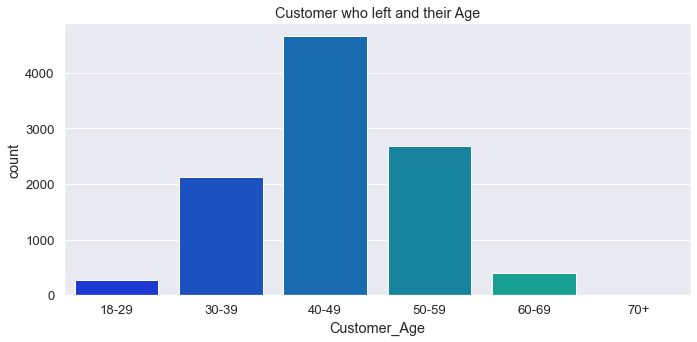

In [126]:

bins = [18, 30, 40, 50, 60, 70, 110]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
age = pd.cut(df['Customer_Age'], bins, labels = labels,include_lowest = True)

plt.figure(figsize=(10,5))
sns.set_context(context='notebook',font_scale=1.2)
sns.set_style('darkgrid')
sns.countplot(age,palette='winter');
plt.title('Customer who left and their Age');

Stats of Existing Customer Age count    8500.00
mean       46.26
std         8.08
min        26.00
25%        41.00
50%        46.00
75%        52.00
max        73.00
Name: Customer_Age, dtype: float64
 
Stats of Attrited Customer Age count    1627.00
mean       46.66
std         7.67
min        26.00
25%        41.00
50%        47.00
75%        52.00
max        68.00
Name: Customer_Age, dtype: float64


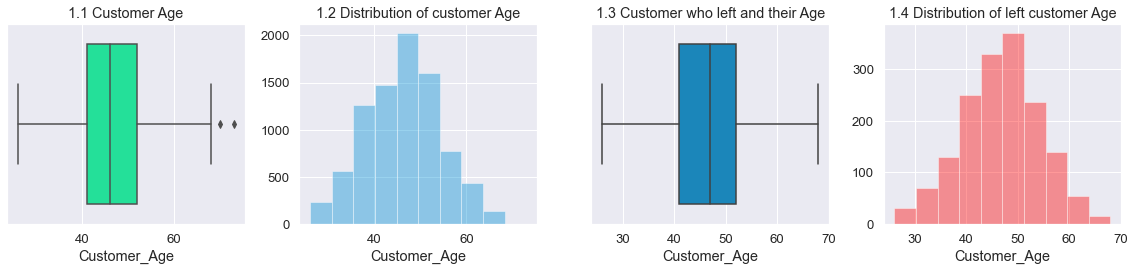

In [127]:
# Customer Age
left_customer = df[df['Attrition_Flag']=='Attrited Customer']
Existing_Customer = df[df['Attrition_Flag']=='Existing Customer']
# layout
fig, ax = plt.subplots(1,4,figsize=(16,4))
sns.set_context(context='notebook',font_scale=1.2)
sns.set_style('darkgrid')

# plot
sns.boxplot(Existing_Customer['Customer_Age'],color='#05ffa1',ax = ax[0]);
sns.distplot(Existing_Customer['Customer_Age'],ax = ax[1],kde=False,bins=10);
sns.boxplot(left_customer['Customer_Age'],ax = ax[2]);
sns.distplot(left_customer['Customer_Age'],ax = ax[3],color='red',kde=False,bins=10);

# label
ax[0].title.set_text('1.1 Customer Age')
ax[1].title.set_text('1.2 Distribution of customer Age')
ax[2].title.set_text('1.3 Customer who left and their Age')
ax[3].title.set_text('1.4 Distribution of left customer Age')

plt.tight_layout()

print('Stats of Existing Customer Age',round(Existing_Customer['Customer_Age'].describe(),2))
print(' ')
print('Stats of Attrited Customer Age',round(left_customer['Customer_Age'].describe(),2))

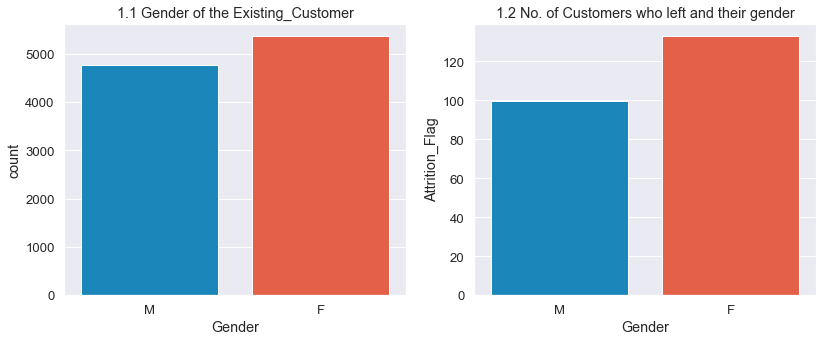

In [128]:
# Gender

plt_Gen = left_customer[['Education_Level','Gender','Attrition_Flag']].groupby(['Education_Level','Gender']).count().reset_index()
plt_Gen = plt_Gen.sort_values('Attrition_Flag')

fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.set_context(context='notebook',font_scale=1.2)
sns.set_style('darkgrid')

sns.countplot(df['Gender'],ax =ax[0])
sns.barplot(x='Gender',y='Attrition_Flag',data=plt_Gen,ax=ax[1],ci=False)

ax[0].title.set_text('1.1 Gender of the Existing_Customer')
ax[1].title.set_text('1.2 No. of Customers who left and their gender')

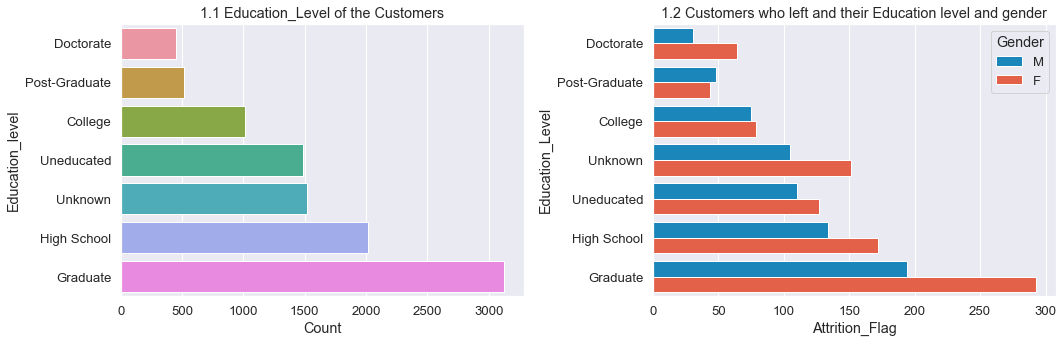

In [129]:
# Education level 
pl = left_customer[['Education_Level','Gender','Attrition_Flag']].groupby(['Education_Level','Gender']).count().reset_index()
pl = pl.sort_values('Attrition_Flag')

# plot data
plot_edu = df['Education_Level'].value_counts().reset_index()
plot_edu.columns =['Education_level','Count']
plot_edu = plot_edu.sort_values('Count')

# plot
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.set_context(context='notebook',font_scale=1.2)
# sns.set_style('darkgrid')

sns.barplot(x='Count',y='Education_level',data=plot_edu, ax=ax[0])
sns.barplot(x='Attrition_Flag',y='Education_Level',hue='Gender', data=pl, ax=ax[1])

# label
ax[0].title.set_text('1.1 Education_Level of the Customers')
ax[1].title.set_text('1.2 Customers who left and their Education level and gender')
plt.tight_layout()


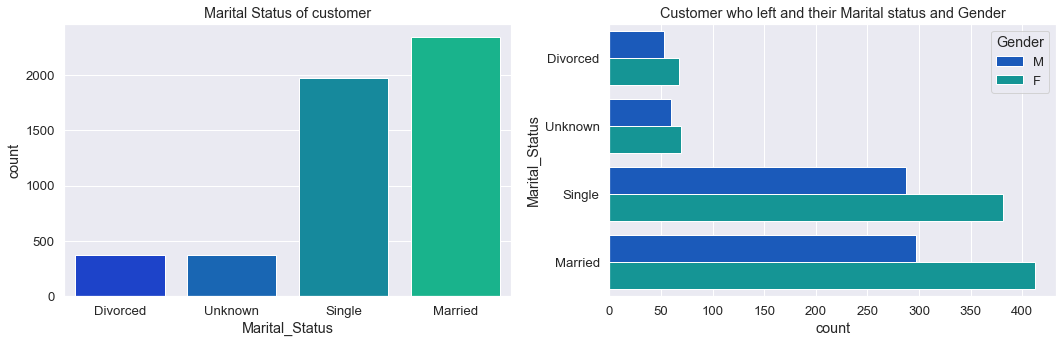

In [130]:

# Marital Status of customers
plot_ms_left = left_customer[['Marital_Status','Gender','Attrition_Flag']].groupby(['Marital_Status','Gender']).count().reset_index()
plot_ms_left.columns = ['Marital_Status','Gender','count']
plot_ms_left = plot_ms_left.sort_values('count')

plot_ms = df[['Marital_Status','Gender','Attrition_Flag']].groupby(['Marital_Status','Gender']).count().reset_index()
plot_ms.columns = ['Marital_Status','Gender','count']
plot_ms = plot_ms.sort_values('count')

# plot
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.set_context(context='notebook',font_scale=1.2)
sns.set_style('darkgrid')

sns.barplot(y='count',x='Marital_Status',data=plot_ms, palette='winter', ax=ax[0],ci=False);
sns.barplot(x='count',y='Marital_Status',hue='Gender', data=plot_ms_left,palette='winter', ax=ax[1])


# title
ax[0].title.set_text('Marital Status of customer');
ax[1].title.set_text('Customer who left and their Marital status and Gender');

plt.tight_layout()

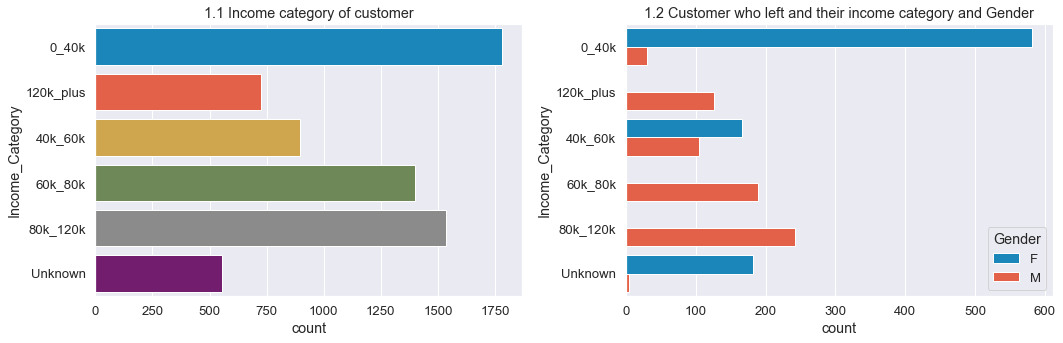

In [131]:
# Income category

# plot data
plot_income_left = left_customer[['Income_Category','Gender','Attrition_Flag']].groupby(['Income_Category','Gender']).count().reset_index()
plot_income_left.columns = ['Income_Category','Gender','count']
#plot_income_left = plot_income_left.sort_values('count')

plot_income = df[['Income_Category','Gender','Attrition_Flag']].groupby(['Income_Category','Gender']).count().reset_index()
plot_income.columns = ['Income_Category','Gender','count']
#plot_income = plot_income.sort_values('count')

# plot
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.set_context(context='notebook',font_scale=1.2)
sns.set_style('darkgrid')

sns.barplot(x='count',y='Income_Category',data=plot_income, ax=ax[0],ci=False)
sns.barplot(x='count',y='Income_Category', data=plot_income_left, hue='Gender', ax=ax[1],ci=False)

# title
ax[0].title.set_text('1.1 Income category of customer')
ax[1].title.set_text('1.2 Customer who left and their income category and Gender')

plt.tight_layout()

*************************************
Customer who left and their card type
*************************************
  Card_Category Gender  count
0          Blue      F    890
1          Blue      M    629
2          Gold      F      8
3          Gold      M     13
4      Platinum      F      4
5      Platinum      M      1
6        Silver      F     28
7        Silver      M     54
*************************************


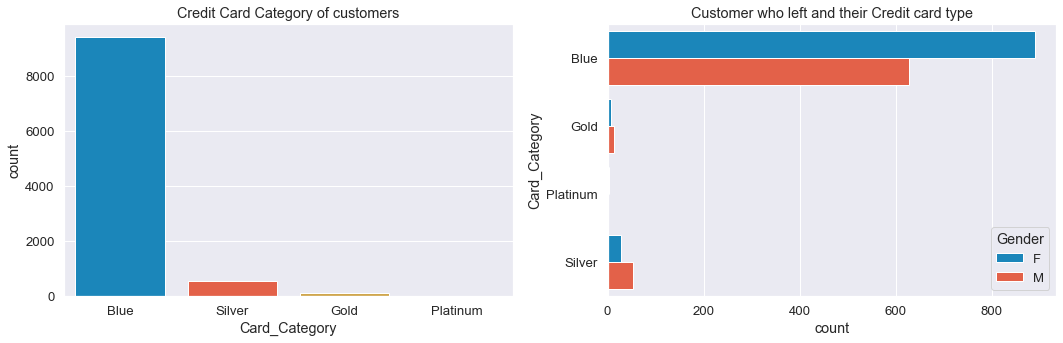

In [132]:

# plot data
plot_card_left = left_customer[['Card_Category','Gender','Attrition_Flag']].groupby(['Card_Category','Gender']).count().reset_index()
plot_card_left.columns = ['Card_Category','Gender','count']
#plot_income_left = plot_income_left.sort_values('count')

plot_card = df['Card_Category'].value_counts().reset_index()
plot_card.columns = ['Card_Category','count']


# plot
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.set_context(context='notebook',font_scale=1.2)
sns.set_style('darkgrid')

sns.barplot(y='count',x='Card_Category',data=plot_card, ax=ax[0],ci=False)
sns.barplot(x='count',y='Card_Category', data=plot_card_left,hue='Gender', ax=ax[1],ci=False)

# title
ax[0].title.set_text('Credit Card Category of customers')
ax[1].title.set_text('Customer who left and their Credit card type')

plt.tight_layout()

print('*************************************')
print('Customer who left and their card type')
print('*************************************')
print(plot_card_left)
print('*************************************')

*************************************
Credit limit
count    10127.000000
mean      8631.953698
std       9088.776650
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11067.500000
max      34516.000000
Name: Credit_Limit, dtype: float64
*************************************
Customer who left and their credit limit
count     1627.000000
mean      8136.039459
std       9095.334105
min       1438.300000
25%       2114.000000
50%       4178.000000
75%       9933.500000
max      34516.000000
Name: Credit_Limit, dtype: float64
*************************************


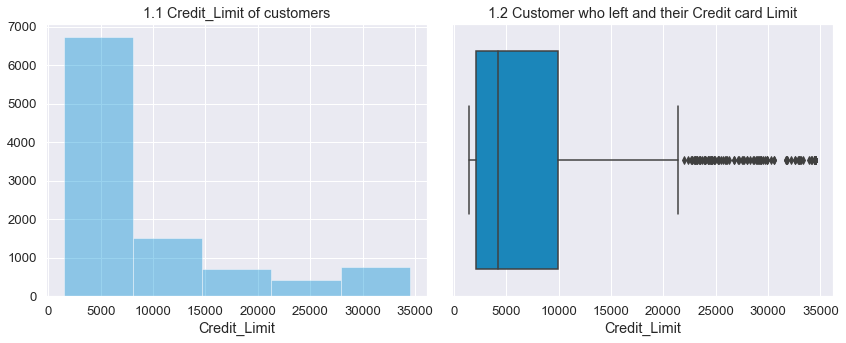

In [133]:

# plot data

# plot
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.set_context(context='notebook',font_scale=1.2)
sns.set_style('darkgrid')

sns.distplot(df.Credit_Limit,bins=5,ax=ax[0],kde=False)
sns.boxplot(left_customer.Credit_Limit, ax=ax[1])

# title
ax[0].title.set_text('1.1 Credit_Limit of customers')
ax[1].title.set_text('1.2 Customer who left and their Credit card Limit')

plt.tight_layout()

print('*************************************')
print('Credit limit')
print(df.Credit_Limit.describe())
print('*************************************')
print('Customer who left and their credit limit')
print(left_customer.Credit_Limit.describe())
print('*************************************')

Text(0.5, 1.0, 'Outlier in data')

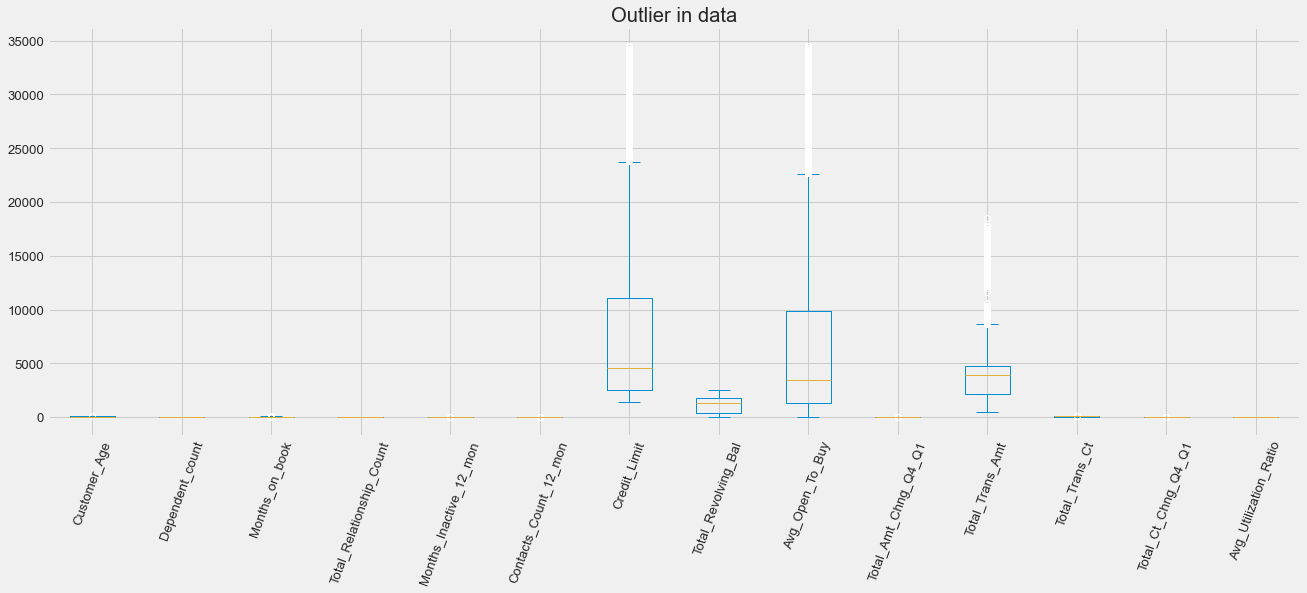

In [134]:
# outlier

plt.style.use('fivethirtyeight')
outlier= df.plot(kind='box',figsize=(20,7))
plt.xticks(rotation=70)
plt.title('Outlier in data')

In [135]:
def treat_outlier(x):
    q5 = np.percentile(x,5)
    q25= np.percentile(x,25)
    q75= np.percentile(x,75)
    up_trend=np.percentile(x,95)
    IQR = q75-q25
    low_level = q25-(1.5*IQR)
    up_level = q75+(1.5*IQR)
    
    return x.apply(lambda y: up_trend if y> up_level else y).apply(lambda y: q5 if y < low_level else y)

In [136]:
outlier_list = ['Credit_Limit','Avg_Open_To_Buy','Total_Trans_Amt']

In [137]:
for i in df[outlier_list]:
    df[i]=treat_outlier(df[i])

In [138]:
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [139]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Attrited Customer':1, 'Existing Customer':0})

In [140]:
df_dummies = pd.get_dummies(df)
df_dummies

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_0_40k,Income_Category_120k_plus,Income_Category_40k_60k,Income_Category_60k_80k,Income_Category_80k_120k,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,0,1,0,0,1,0,0,0
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,1,0,0,0,0,0,1,0,0,0
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,0,1,0,1,0,0,0
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,1,0,0,0,0,0,1,0,0,0
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,2,40,3,2,3,4003.0,1851,2152.0,...,0,0,1,0,0,0,1,0,0,0
10123,1,41,2,25,4,2,3,4277.0,2186,2091.0,...,0,0,1,0,0,0,1,0,0,0
10124,1,44,1,36,5,3,4,5409.0,0,5409.0,...,1,0,0,0,0,0,1,0,0,0
10125,1,30,2,36,4,3,3,5281.0,0,5281.0,...,0,0,1,0,0,0,1,0,0,0


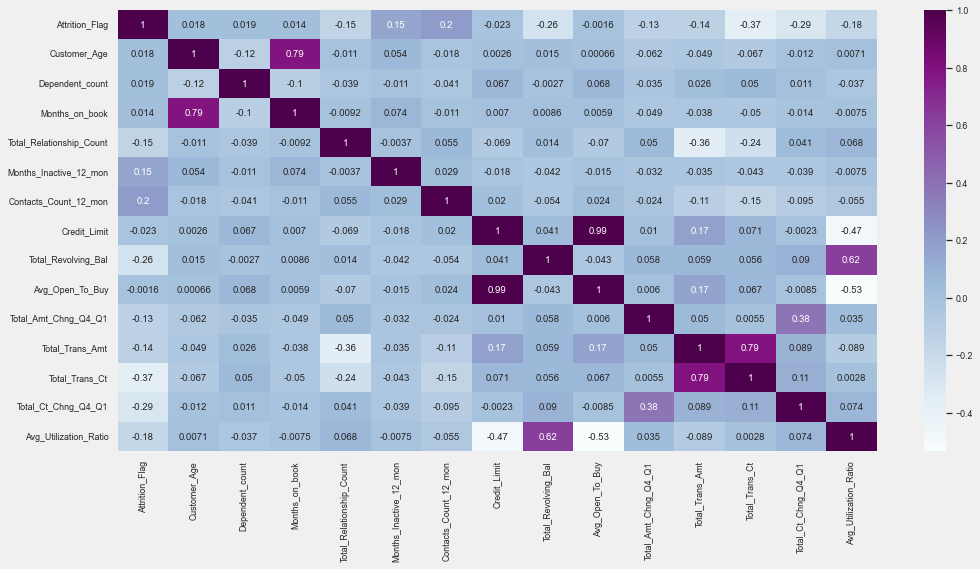

In [141]:
plt.figure(figsize=(15,8))
sns.set_context(context='notebook',font_scale=.8)
sns.heatmap(df.corr(method='pearson'),cmap='BuPu',annot=True)
plt.tight_layout()

In [142]:
colsToDrop = ['Avg_Utilization_Ratio','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Total_Revolving_Bal','Total_Relationship_Count', 'Total_Amt_Chng_Q4_Q1','Total_Trans_Amt']
df.drop(colsToDrop, axis=1, inplace=True)

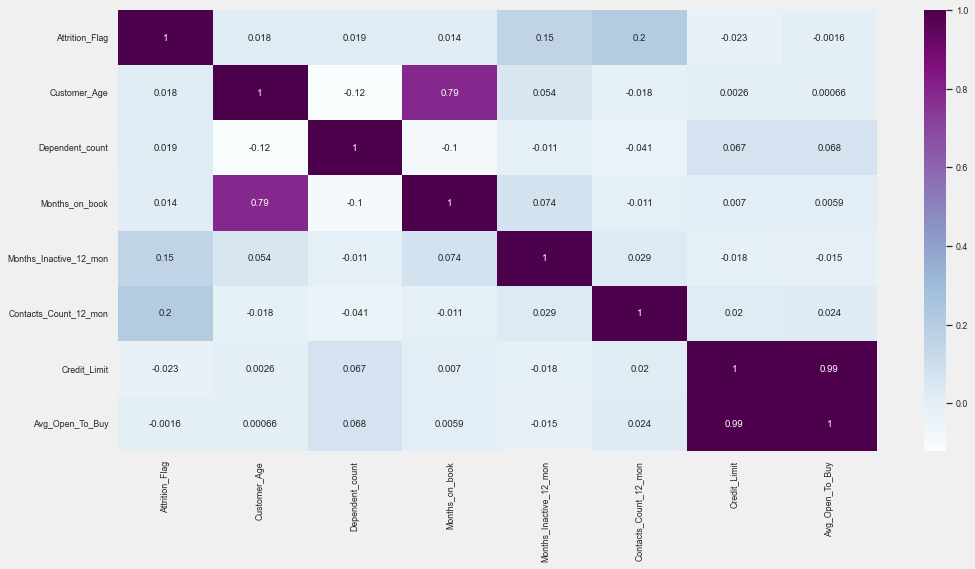

In [143]:
plt.figure(figsize=(15,8))
sns.set_context(context='notebook',font_scale=.8)
sns.heatmap(df.corr(method='pearson'),cmap='BuPu',annot=True)
plt.tight_layout()

In [144]:
X = df_dummies.drop("Attrition_Flag", axis = 1)
y = df_dummies["Attrition_Flag"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [145]:
# Train - Validation Split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 42)

In [146]:
modeller = []
modelName = []


In [147]:
def dictforloop(index,accuracy,recall,f1):
    dictForPlot = []
    dictForList =[]
    
    dictForPlot.append({"Model_Name":index,"ScoreType":"accuracy","Score":accuracy})
    dictForPlot.append({"Model_Name":index,"ScoreType":"Recall_Score_0","Score":recall[0]}) 
    dictForPlot.append({"Model_Name":index,"ScoreType":"Recall_Score_1","Score":recall[1]})
    dictForPlot.append({"Model_Name":index,"ScoreType":"F1_Score_0","Score":f1[0]}) 
    dictForPlot.append({"Model_Name":index,"ScoreType":"F1_Score_1","Score":f1[1]})
    
    dictForList = {"Model_Name":index,"Accuracy":accuracy,"Recall_Score_0":recall[0],
              "Recall_Score_1":recall[1],"F1_Score_0":f1[0],"F1_Score_1":f1[1]}
    
    return dictForPlot,dictForList
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)    
def importance_plot(model_name, thresh_hold):
    Importance=pd.DataFrame({"Importance":model_name.feature_importances_*100},
                       index=X_train.columns)
    importance = Importance.sort_values(by="Importance",
                      axis=0,ascending=False).iloc[0:10,:]
    importance.sort_values(by="Importance",
                      axis=0,ascending=True).plot(kind="barh",color="r")
    plt.xlabel("Değişken Önem Düzeyleri")


    a = Importance.sort_values("Importance", ascending = False)
    display_all(a[a['Importance']>thresh_hold])


In [148]:
def roc_auc_curve_plot(model_name, X_testt, y_testt):
    ns_probs = [0 for _ in range(len(y_testt))]
    # fit a model
    # predict probabilities
    model_probs = model_name.predict_proba(X_testt)
    # keep probabilities for the positive outcome only
    model_probs = model_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_testt, ns_probs)
    lr_auc = roc_auc_score(y_testt, model_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print( ': ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_testt, ns_probs)
    model_fpr, model_tpr, _ = roc_curve(y_testt, model_probs)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(model_fpr, model_tpr, marker='.', label='Logistic')
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show() 

In [149]:
def plot_roc_curve(fpr, tpr):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr,tpr, label = roc_auc_score) 
    plt.plot([0,1],ls='--')
    plt.plot([0,0],[1,0],c='.5')
    plt.plot([1,1],c='.5')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()   
    

In [150]:
def conf_mtrx(y_test, y_pred, model): 

    cm = confusion_matrix(y_test,y_pred)    
    f, ax = plt.subplots(figsize =(5,5))
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cm,annot = True, linewidths=0.5, linecolor="red",fmt = ".0f",ax=ax)#,cmap=plt.cm.RdPu
    plt.xlabel("predicted y values")
    plt.ylabel("real y values")
    plt.title("\nConfusion Matrix")
    plt.show()


In [151]:
def rc_recis_scres(y_test, y_pred, algorithm_name):
    from sklearn.metrics import recall_score,precision_score,accuracy_score, f1_score

    rs=recall_score(y_test, y_pred) 
    ps=precision_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)

    print()    

In [152]:

def Algoinfo(model,alg_name, x_trainn,x_testt, y_trainn, y_testt):
    from sklearn.metrics import roc_auc_score,roc_curve
    
    modell = model()
    result_model = modell.fit(x_trainn, y_trainn)
    y_pred = result_model.predict(x_testt)    
    conf_mtrx(y_testt, y_pred, model)
    print("*****",alg_name," ALGORITHM:") 
    rc_recis_scres(y_testt, y_pred, alg_name)
    
    
    
    modeller.append(result_model)
    modelName.append(alg_name)
    
    print("classification_report\n",classification_report(y_testt, y_pred))
    print("Accuracy Score for ", alg_name ,accuracy_score(y_testt, y_pred))
    
    tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
    y_probs = modell.predict_proba(x_testt)[:,1] # This will give you positive class prediction probabilities  
    y_pred = np.where(y_probs > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.

    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    probs = modell.predict_proba(X_test)
    probs = probs[:, 1]
    
    print()
    auc = roc_auc_score(y_test, probs)
    print('AUC: %.2f' % auc)
    #plot_roc_curve(fpr, tpr)
    return model  

In [153]:
rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_val)



print("classification_report\n",classification_report(y_val, y_pred))
print("Accuracy Score for ",accuracy_score(y_val, y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1732
           1       0.92      0.77      0.84       294

    accuracy                           0.96      2026
   macro avg       0.94      0.88      0.91      2026
weighted avg       0.96      0.96      0.95      2026

Accuracy Score for  0.9565646594274433


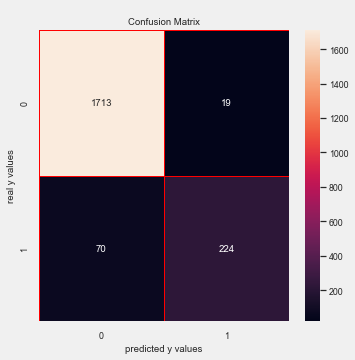

***** Random Forest Classifier  ALGORITHM:

classification_report
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1732
           1       0.92      0.76      0.83       294

    accuracy                           0.96      2026
   macro avg       0.94      0.88      0.90      2026
weighted avg       0.96      0.96      0.95      2026

Accuracy Score for  Random Forest Classifier 0.956071076011846

AUC: 0.99


sklearn.ensemble._forest.RandomForestClassifier

In [154]:
Algoinfo(RandomForestClassifier, "Random Forest Classifier", X_train, X_val, y_train, y_val)

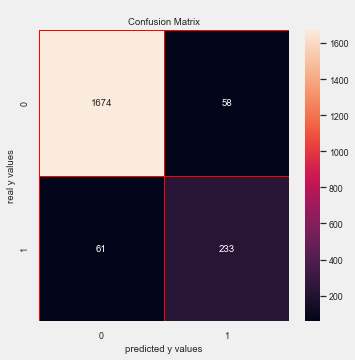

***** Decision Tree Classifier  ALGORITHM:

classification_report
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1732
           1       0.80      0.79      0.80       294

    accuracy                           0.94      2026
   macro avg       0.88      0.88      0.88      2026
weighted avg       0.94      0.94      0.94      2026

Accuracy Score for  Decision Tree Classifier 0.941263573543929

AUC: 0.88


sklearn.tree._classes.DecisionTreeClassifier

In [155]:
Algoinfo(DecisionTreeClassifier, "Decision Tree Classifier", X_train, X_val, y_train, y_val)

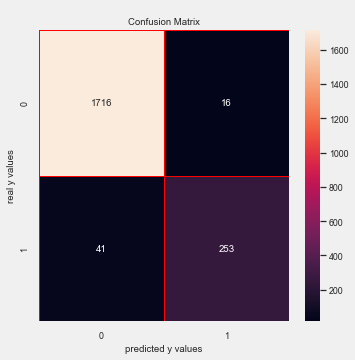

***** Gradient Boosting Classifier  ALGORITHM:

classification_report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1732
           1       0.94      0.86      0.90       294

    accuracy                           0.97      2026
   macro avg       0.96      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026

Accuracy Score for  Gradient Boosting Classifier 0.9718657453109576

AUC: 0.99


sklearn.ensemble._gb.GradientBoostingClassifier

In [156]:
Algoinfo(GradientBoostingClassifier, "Gradient Boosting Classifier", X_train, X_val, y_train, y_val)

In [157]:
final_model_name = []
final_model_ac = []
final_model_recall = []
final_model_f1 = []

ac = accuracy_score(y_test, y_pred)
recallscore = recall_score(y_test, y_pred,average=None)
f1score = f1_score(y_test, y_pred,average=None)

In [158]:
rf = RandomForestClassifier(max_depth= 15, min_samples_leaf= 1, min_samples_split= 10, n_estimators= 800)
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
y_probs = rf_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_probs > 0.35, 1, 0) # This will threshold the probabilities to give class predictions.


ac_rf = accuracy_score(y_test, y_pred)
recallscore_rf = recall_score(y_test, y_pred,average=None)
f1score_rf = f1_score(y_test, y_pred,average=None)

final_model_name.append("Random Forest")
final_model_ac.append(ac_rf)
final_model_recall.append(recallscore_rf)
final_model_f1.append(f1score_rf)


print("classification_report\n",classification_report(y_test, y_pred))
print("Accuracy Score for ",accuracy_score(y_test, y_pred))

classification_report
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1699
           1       0.85      0.88      0.86       327

    accuracy                           0.95      2026
   macro avg       0.91      0.92      0.92      2026
weighted avg       0.96      0.95      0.95      2026

Accuracy Score for  0.9545903257650543


No Skill: ROC AUC=0.500
: ROC AUC=0.985


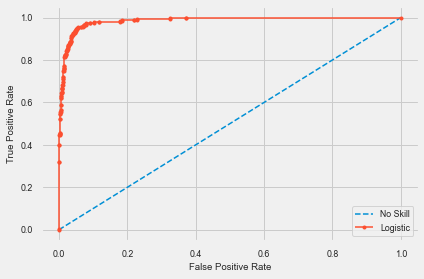

In [159]:
roc_auc_curve_plot(rf_model,X_test, y_test)

,Importance
Total_Trans_Amt,17.848737
Total_Trans_Ct,17.403904
Total_Ct_Chng_Q4_Q1,12.392275
Total_Revolving_Bal,11.343108
Avg_Utilization_Ratio,6.925728
Total_Relationship_Count,6.559658
Total_Amt_Chng_Q4_Q1,5.814204
Credit_Limit,2.856245
Customer_Age,2.690065
Contacts_Count_12_mon,2.638753


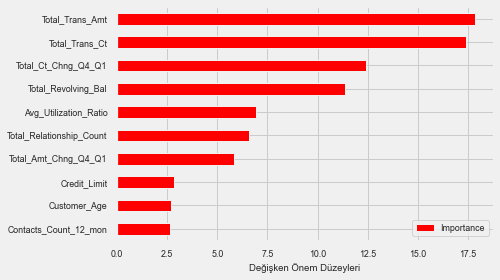

In [160]:
importance_plot(rf_model, 1)